# Import Library

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Membaca data dari file CSV ke dalam DataFrame

In [2]:
df = pd.read_csv("games-data.csv")

# A. Supervised Learning

## A1. Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df['user score'] = pd.to_numeric(df['user score'], errors='coerce').fillna(0)

# Mengambil fitur ('critics') dan label ('score') dari DataFrame 'df'
game_X, game_y = df[['critics']], df['score']

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(
    game_X, game_y, test_size=0.2, random_state=31 
)

# Membuat objek model regresi linear dan melatih model regresi linear menggunakan data pelatihan
reg = LinearRegression()
reg.fit(X_train, y_train)

# Menghitung prediksi model regresi
y_prediksi_game = reg.predict(X_test)

## A2. Evaluasi hasil prediksi

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_prediksi_game)
mse = mean_squared_error(y_test, y_prediksi_game)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_prediksi_game)

# Menampilkan hasil evaluasi
print(f'Mean Absolute Error (MAE)      : {mae:.2f}')
print(f'Mean Squared Error (MSE)       : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'R-squared Score (R2)           : {r2:.2f}')

Mean Absolute Error (MAE)      : 9.19
Mean Squared Error (MSE)       : 138.81
Root Mean Squared Error (RMSE) : 11.78
R-squared Score (R2)           : 0.09


**Penjelasan :**

**- Mean Absolute Error (MAE) :** MAE adalah sekitar 9.19. Ini berarti rata-rata kesalahan absolut antara nilai prediksi model dan nilai sebenarnya adalah sekitar 9.19. MAE memberikan perkiraan rata-rata seberapa jauh prediksi model dari nilai sebenarnya. Semakin rendah MAE, semakin baik kinerja model.

**- Mean Squared Error (MSE) :** MSE adalah sekitar 138.81. Ini berarti rata-rata kesalahan kuadrat antara nilai prediksi model dan nilai sebenarnya adalah sekitar 138.81. MSE memberikan lebih banyak penekanan pada kesalahan besar karena kuadrat mengindahkan tanda, sehingga kesalahan besar akan memberikan kontribusi yang lebih besar terhadap nilai MSE.

**- Root Mean Squared Error (RMSE) :** RMSE adalah akar kuadrat dari MSE, yang sekitar 11.78. Ini mengukur rata-rata dari selisih antara prediksi model dan nilai sebenarnya dalam unit yang sama seperti data asli. RMSE lebih interpretatif karena memiliki unit yang sama dengan variabel target. Semakin rendah RMSE, semakin baik kinerja model.

**- R-squared Score (R2-Score) :** R2-Score adalah sekitar 0.09. Nilai R2-Score berkisar antara 0 hingga 1. R2-Score sekitar 0.09 berarti bahwa model hanya dapat menjelaskan sekitar 9% variasi dalam data. Nilai R2-Score yang rendah menunjukkan bahwa model tidak cocok dengan baik dengan data atau bahwa fitur 'critics' mungkin tidak cukup kuat untuk memprediksi label 'score'.

## A3. Plot hasil prediksi

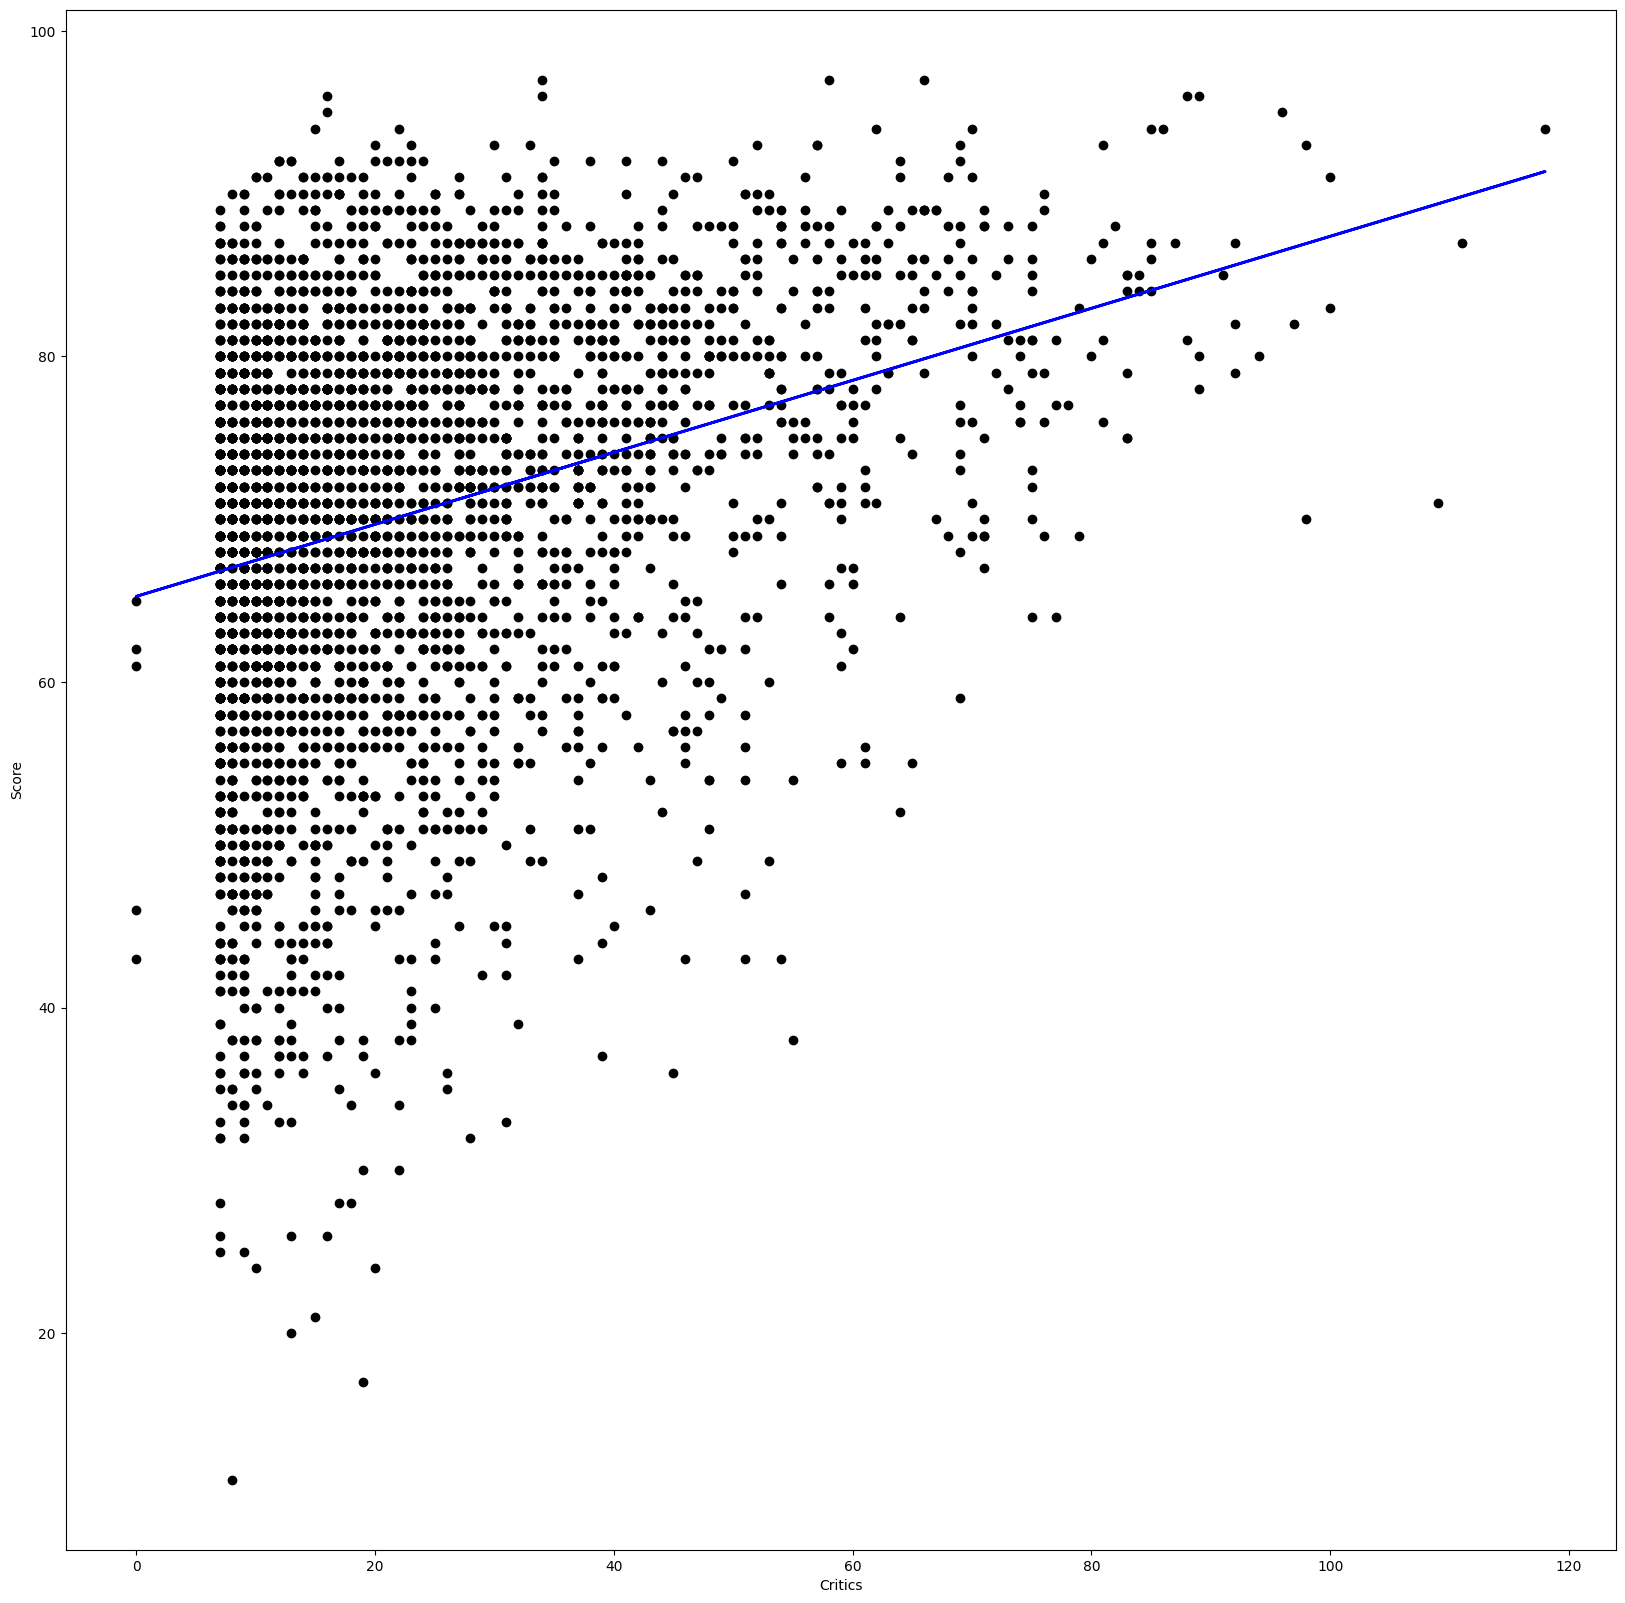

In [5]:
plt.figure(figsize=(20,20))
plt.scatter(X_test, y_test, c='black')
plt.plot(X_test, y_prediksi_game, c='blue', linewidth=2)
plt.xlabel("Critics")
plt.ylabel("Score")
plt.show()

# B. Unsupervised Learning

**Jumlah Target**

In [6]:
jumlah_target = df['score'].nunique()
print("Jumlah_target dalam kolom 'score':", jumlah_target)

Jumlah_target dalam kolom 'score': 85


## B1. Implementasikan metode K-Means pada dataset

In [7]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

# Mengganti 'tbd' dengan 0 dan mengonversi kolom 'user score' ke tipe data float
df['user score'] = pd.to_numeric(df['user score'], errors='coerce').fillna(0)

# Memilih fitur numerik
X = df[['user score', 'critics']]

# Menentukan jumlah cluster (K)
K = jumlah_target

# Membuat array warna yang sesuai dengan jumlah kluster (K)
colors = cm.get_cmap('viridis', K)

# Membuat model K-Means
kmeans = KMeans(n_clusters=K)

# Melatih model
kmeans.fit(X)

# Menambahkan kolom 'Cluster' ke DataFrame dengan label cluster
df['Cluster'] = kmeans.labels_

C:\Users\User\Documents\Venv_KB\venv_B1-21\Dhimas_068\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## B2. Evaluasi cluster yang telah diprediksi

**- Unlabeled Dataset**

In [8]:
from sklearn import metrics

# Menambahkan kolom 'Cluster' ke DataFrame dengan label cluster
df['Cluster'] = kmeans.labels_

# Menghitung metrik evaluasi tanpa label asli dataset
silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
davies_bouldin_index = metrics.davies_bouldin_score(X, kmeans.labels_)
calinski_harabasz_index = metrics.calinski_harabasz_score(X, kmeans.labels_)

print("Silhouette Score        :", silhouette_score)
print("Davies-Bouldin Index    :", davies_bouldin_index)
print("Calinski-Harabasz Index :", calinski_harabasz_index)

Silhouette Score        : 0.4169350177825769
Davies-Bouldin Index    : 0.780280009721742
Calinski-Harabasz Index : 89915.72819162792


**- Labeled Dataset**

In [9]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

# Cross-Tabulation (Cross-Tab)
cross_tab = pd.crosstab(df["Cluster"], df["score"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["score"], df["Cluster"])
print(f"Adjusted Rand Index (ARI)           : {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df["score"], df["Cluster"])
print(f"Normalized Mutual Information (NMI) : {nmi:.2f}")

# Homogeneity, Completeness, and V-Measure (HCV-M)
homogeneity = homogeneity_score(df["score"], df["Cluster"])
completeness = completeness_score(df["score"], df["Cluster"])
v_measure = v_measure_score(df["score"], df["Cluster"])
print(f"Homogeneity Score                   : {homogeneity:.2f}")
print(f"Completeness Score                  : {completeness:.2f}")
print(f"V-Measure Score                     : {v_measure:.2f}")

Cross-Tabulation:
score    11  16  17  18  19  20  21  22  23  24  ...  90  91  92  93  94  95  \
Cluster                                          ...                           
0         0   0   0   0   0   0   0   0   0   0  ...   2   4   2   1   0   0   
1         0   0   0   0   0   0   0   0   0   0  ...   2   4   0   2   0   0   
2         0   0   0   0   0   0   0   0   0   0  ...   0   1   3   3   1   2   
3         0   0   0   0   0   0   0   0   0   0  ...   3   0   0   0   0   0   
4         0   0   0   0   0   0   0   0   0   0  ...   4   4   2   3   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
80        0   0   0   0   0   0   0   0   0   0  ...   5   3   2   2   2   2   
81        0   0   0   0   0   0   0   0   0   0  ...   0   3   2   2   0   2   
82        0   0   0   0   0   0   0   0   0   0  ...   3   0   0   0   0   0   
83        0   0   0   0   0   0   0   0   0   0  ...   0   0   2   1   0   0   
84        0   0   0   

## B3. Plot hasil clustering

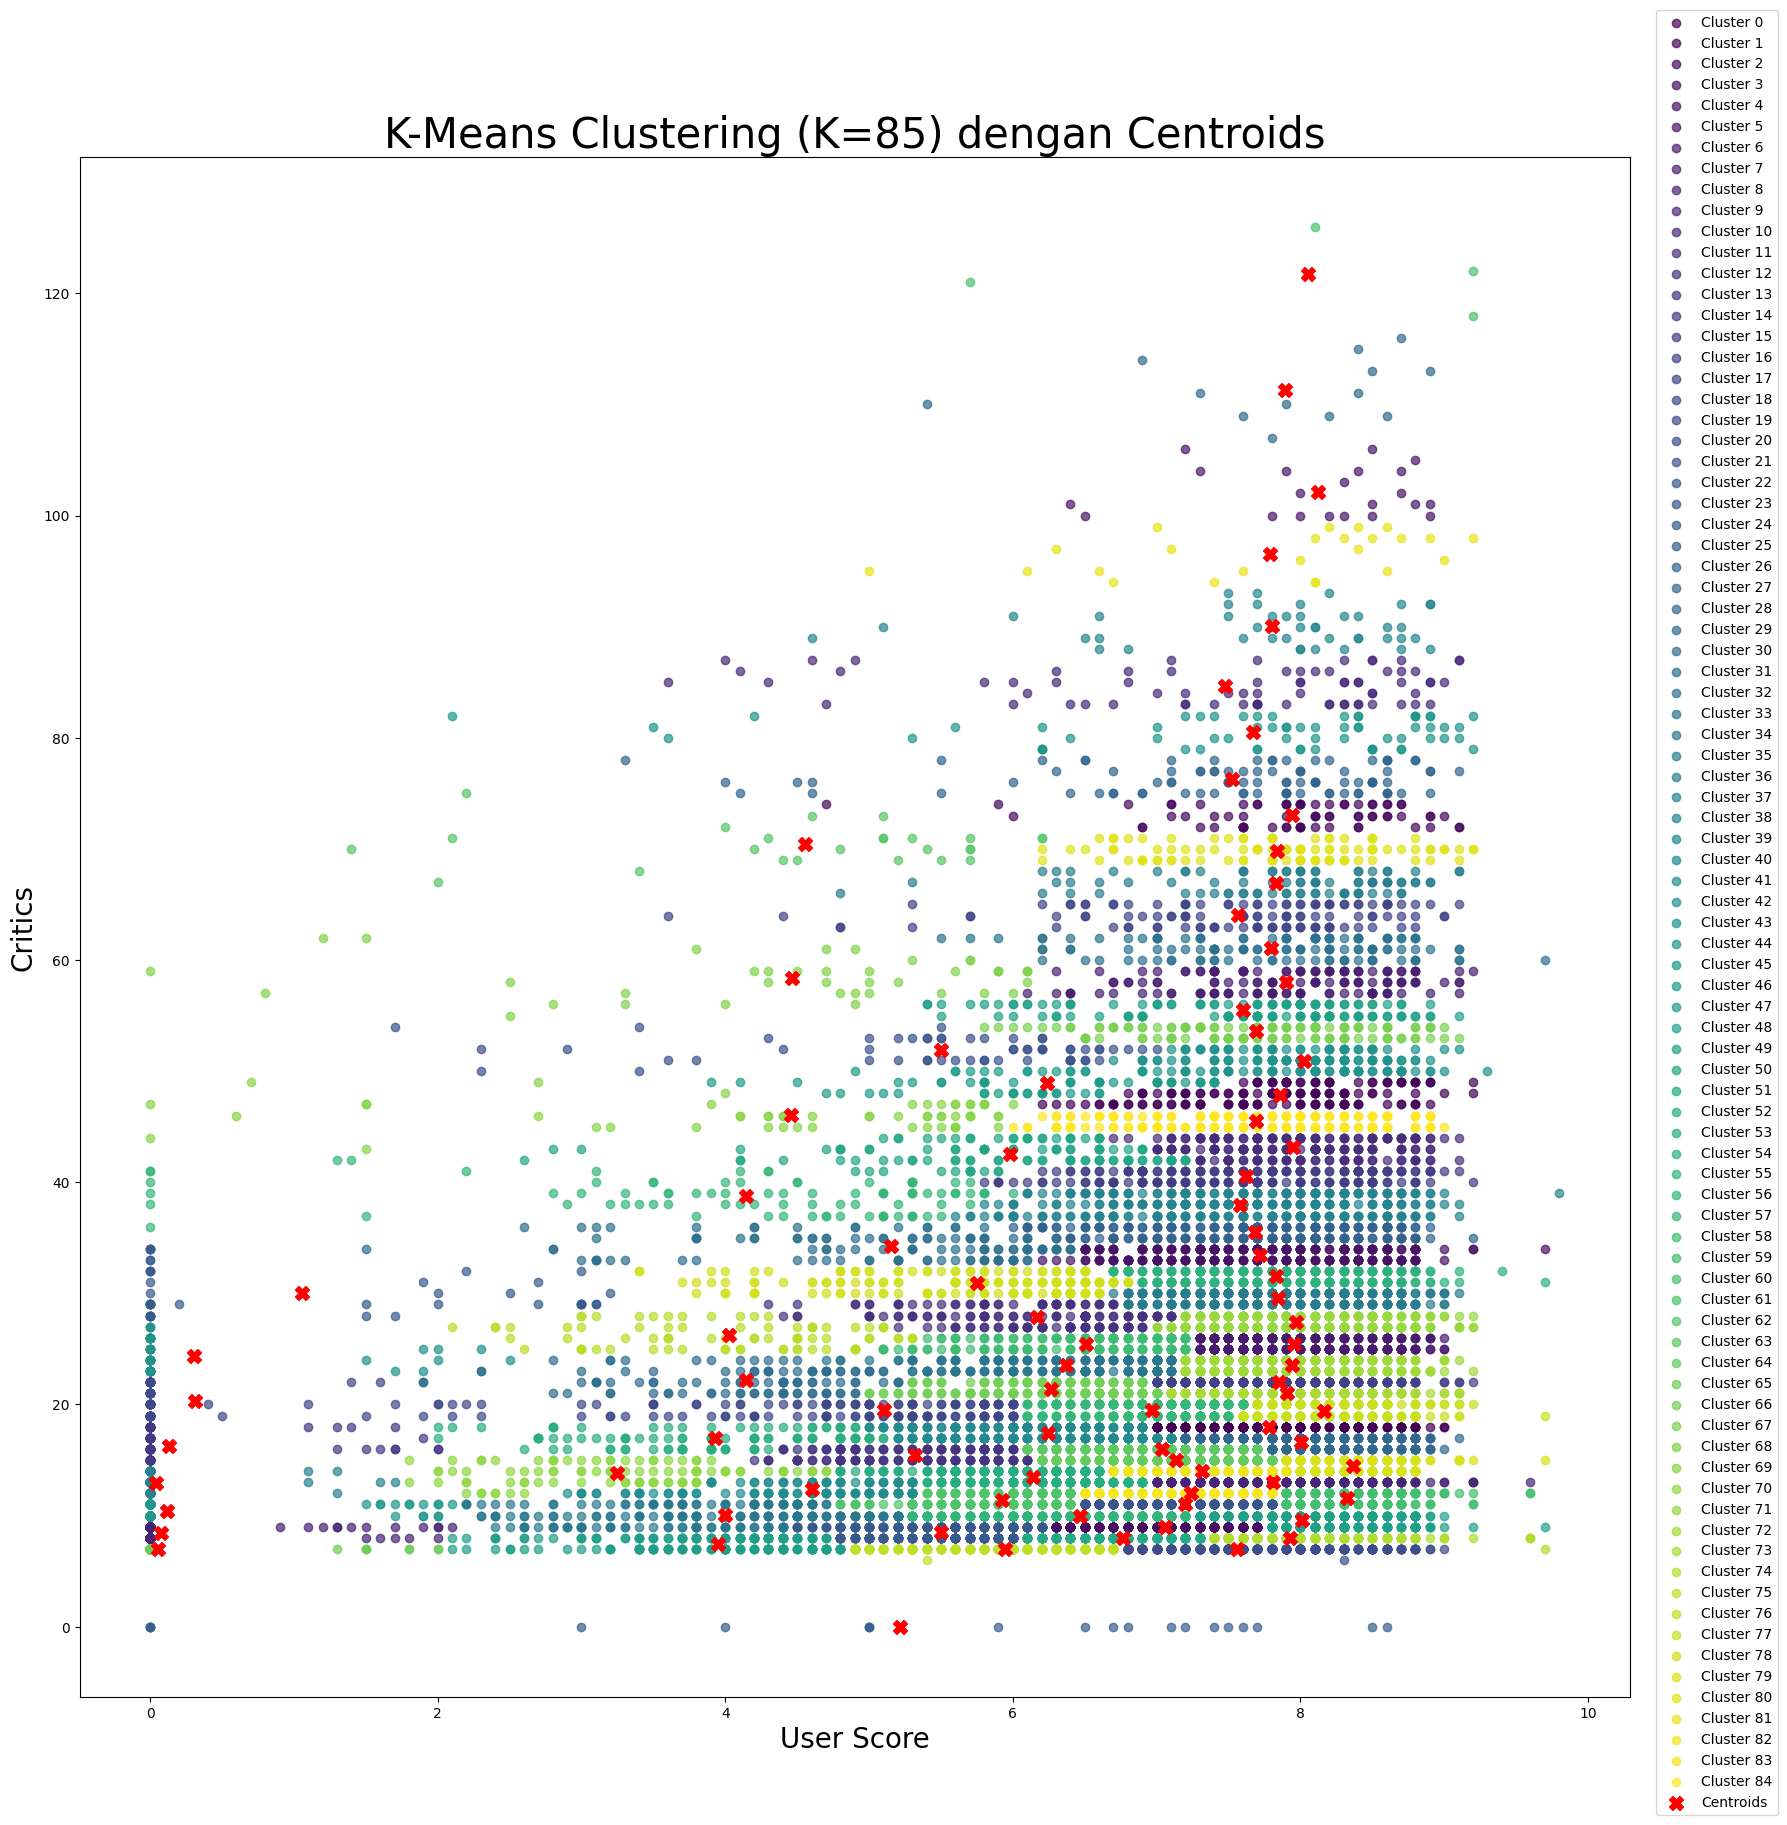

In [10]:
# Mendapatkan koordinat centroid
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20,20))
for cluster in range(K):
    plt.scatter(X['user score'][df['Cluster'] == cluster],
                X['critics'][df['Cluster'] == cluster], 
                label=f'Cluster {cluster}', 
                alpha=0.7,
                c=[colors(cluster / K)])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('User Score', fontsize=20)
plt.ylabel('Critics', fontsize=20)
#plt.title('K-Means Clustering with Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids", fontsize=30)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()